# Scientific python: NumPy, SciPy and Matplotlib

## Learning objectives

  * Learn what numpy arrays are
  * Learn basic array manipulations
  * Learn what vectorial code is
  * Quick overview of SciPy
  * Learn how to do a simple 2D plot and decorate it
  * Learn how to combine plots in one figure
  
Recommended source: http://scipy-lectures.org

## SciPy ecosystem

From their [website](https://scipy.org):
> SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages:
>  * NumPy
>  * SciPy library
>  * Matplotlib 
>  * IPython
>  * Sympy
>  * Pandas

## NumPy

* NumPy supports:

  * Multidimensional arrays (`ndarray`)
  * Matrices and linear algebra operations
  * Random number generation
  * Fourier transforms
  * Polynomials
  * Tools for integrating with Fortran/C
  
* NumPy provides fast precompiled functions for numerical routines


* https://www.numpy.org/


### NumPy Arrays overview

* Core (or Standard) Python Library provides lists and 1D arrays (array.array)

  * Lists are general containers for objects
  * Arrays are 1D containers for objects of the same type
  * Limited functionality
  * Some memory and performance overhead associated with these structures

* NumPy provides multidimensional arrays (numpy.ndarray)
  * Can store many elements of the same data type in multiple dimensions
  * cf. Fortran/C/C++ arrays
  * More functionality than Core Python e.g. many conveninent methods for array manipulation
  * Efficient storage and execution


* [Online documentation !](https://docs.scipy.org/doc/numpy/)

### Creating 1D arrays

Import `numpy` as <i>alias</i> "np"

In [2]:
import numpy as np

There are many ways to create 1d array e.g. from a list

In [3]:
a = np.array([-1, 0, 1])
print(a)

[-1  0  1]


Or from other arrays ("copy constructor")

In [4]:
b = np.array(a)
print(b)

[-1  0  1]


All Numpy arrays are of type '`ndarray`'

In [5]:
print(type(b))
li = [1, 2, 3]
print(type(li))

<class 'numpy.ndarray'>
<class 'list'>


Arrays can be created using `numpy` functions, e.g.

In [6]:
# arange for arrays (like using range for lists)
a = np.arange( -2, 6, 2 )
print(a)

[-2  0  2  4]


In [7]:
# linspace to create sample step points in an interval
a = np.linspace(-10, 10, 4) 
print(a)
print(np.arange(-10,10,4))

[-10.          -3.33333333   3.33333333  10.        ]
[-10  -6  -2   2   6]


### <span style="color:blue">Exercise </span>
Can you guess what the following functions do?

In [8]:
b = np.zeros(3)
print(b)

[0. 0. 0.]


In [9]:
c = np.ones(3)
print(c)

[1. 1. 1.]


In [10]:
d = np.eye(3)
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Array attributes

As part of the array structure, Numpy keeps track of metadata for the array as "attributes"

In [11]:
# Taking "a" from the previous example
a = np.linspace(-10, 10, 5) 

In [12]:
# Examine key array attributes
print(a)
print("Dimensions ", a.ndim)
print("Shape      ", a.shape)  # number of elements in each dim
print("Size       ", a.size)   # total number of elements
print("Data type  ", a.dtype)  # data type of element e.g. 32 bit float

[-10.  -5.   0.   5.  10.]
Dimensions  1
Shape       (5,)
Size        5
Data type   float64


Data type can be specified at creation:

In [13]:
a = np.array( [1.1,2.2,3.3], np.float32)
print(a)
print("Data type", a.dtype)

[1.1 2.2 3.3]
Data type float32


In [14]:
a = np.array([1,2,3,4], np.float64)

### Multi-dimensional arrays

There are many different ways to create N-dimensional arrays. A two-dimensional array or matrix can be created from, e.g., list of lists

In [16]:
mat = np.array( [[1,2,3], [4,5,6]] )
print(mat)
print("Dimensions: ", mat.ndim)
print("Size:       ", mat.size)
print("Shape:      ", mat.shape)

[[1 2 3]
 [4 5 6]]
Dimensions:  2
Size:        6
Shape:       (2, 3)


`pprint` can be used for fancier display of multi-dimensional arrays:

In [19]:
from pprint import pprint

pprint(mat)
print(mat)

array([[1, 2, 3],
       [4, 5, 6]])
[[1 2 3]
 [4 5 6]]


### <span style="color:blue">Exercise </span>

Work out the shape of the resulting arrays before executing the following cells <br>
(HINT: length of the innermost list gives the size of the rightmost shape index)

In [22]:
i = np.array( [[1,1,1], [2,2,2], [3,3,3], [4,4,4]] ) 
pprint(i)
print("i", i.shape)
print(i.ndim)
print(i.size)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])
i (4, 3)
2
12


In [23]:
j = np.array( [[[1,1],[2,2],[3,3],[4,4]] , [[1,1],[2,2],[3,3],[4,4]], [[1,1],[2,2],[3,3],[4,4]]] )
print("j", j.shape)
print(j.ndim)
print(j.size)

j (3, 4, 2)
3
24


Can create 2d arrays with complex elements by specifying the data type

In [24]:
alist = [[1, 2, 3], [4, 5, 6]]
mat = np.array(alist, complex)
pprint(mat)

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j]])


### Accessing arrays

Basic indexing and slicing can be used to access array elements, as we know from lists

In [25]:
# a[start:stop:stride] (not inclusive of stop)
a = np.arange(8)     # another function for creating arrays
print("a", a)
print(a[2:6])
print("a[0:7:3]", a[0:7:3])
print("a[:5:2]", a[:5:2])

a [0 1 2 3 4 5 6 7]
[2 3 4 5]
a[0:7:3] [0 3 6]
a[:5:2] [0 2 4]


Negative indices are valid!

In [26]:
# Useful for accessing the last element
print(a[-1])

7


### <span style="color:blue">Exercise </span>

Can you guess the output of the following cell?

In [27]:
print(a[2:-3:2])

[2 4]


For multi-dimensional arrays, tuples or index notations can be used.

In [28]:
# Basic indexing of a 3d array
c = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(c.shape)
print("c[1][0][1]:", c[1][0][1]) # using index notation
print("c[1,0,1]:", c[1,0,1])     # using a tuple (more performant)

(2, 2, 2)
c[1][0][1]: 6
c[1,0,1]: 6


If the number of indices given is less than the number of axes, missing axes are taken as complete slices

In [29]:
c = np.array([[1,2,3],[5,6,8]])
print(c.shape)
pprint(c)
print("c[1][2]:", c[1][2]) # using index notation
print("c[1,2]:", c[1,2])     # using a tuple (more performant)

(2, 3)
array([[1, 2, 3],
       [5, 6, 8]])
c[1][2]: 8
c[1,2]: 8


In [30]:
c = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])

print(c[1]) 
print(c[1,0])   
print(c[1,0,...]) # can use elipsis (3 dots) for missing indices

[[5 6]
 [7 8]]
[5 6]
[5 6]


### Array copies

Simple assignment creates references or 'shallow' copies of arrays

In [31]:
a = np.array( [-2,6,2] )
print("a", a)
b = a
a[0]=20
print("b points to a!", b)

a [-2  6  2]
b points to a! [20  6  2]


Use `copy()` to create a true or 'deep' copy

In [32]:
c = a.copy()
c[2] =42
print(a)

[20  6  2]


In [35]:
# check b really is an independent copy of a
c[0]=0
print("c changes", c)
print("a unaffected", a)

c changes [ 0  6 42]
a unaffected [[1 2 3]
 [4 5 6]
 [7 8 9]]


### Slices and views

A "view" is an array that refers to another array’s data (like references). You can create a view on an array by selecting a slice of an array. No data is copied when a view is created. 

In [36]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
pprint(a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])


In [37]:
# Can assign a slice to a variable and change the array referred to 
# by the slice
s = a[2:3, 1:3]
print(s)
s[:,:] = -2
print("s", s)
print("a", a)

[[8 9]]
s [[-2 -2]]
a [[ 1  2  3]
 [ 4  5  6]
 [ 7 -2 -2]]


### <span style="color:blue">Exercise </span>

Change all the elements with values 7,8,10,11 in matrix `m` below (i.e. bottom right corner elements) to 1000 using a slice

In [38]:
m = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
pprint(m)
m[2:,1:] = 1000
pprint(m)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])
array([[   0,    1,    2],
       [   3,    4,    5],
       [   6, 1000, 1000],
       [   9, 1000, 1000]])


### Reshaping arrays

The shape of an array can be modified, and/or its size changed:

In [41]:
a = np.arange(6)
print("a", a, ", shape:", a.shape)
# modifying the shape attribute (not a copy) requires
# that the size remains the same
a.shape = (3,2)
pprint(a)

a [0 1 2 3 4 5] , shape: (6,)
array([[0, 1],
       [2, 3],
       [4, 5]])


In [42]:
# Or can alter the size and shape of the array with resize().
# May copy/pad depending on shape.
mat = np.arange(6)
print(mat)
mat1 = np.resize(mat, (3, 2))
print(mat1)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]


`base` can be used to check if arrays share the same data (*i.e.* they are not copies):

In [49]:
mat1.base is mat

False

### <span style="color:blue">Exercise </span>

What does the `reshape()` method do?

### Vectorization and operations on arrays

Vectorization is why numpy arrays are great. It allows element-wise operations (avoids writing loops!). What output do the following cells give?

In [50]:
a = np.arange(10).reshape([2,5])
b = np.arange(10).reshape([2,5])
print(a)
print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [51]:
# Try these
-0.1*a
print(-0.1*a)

print(a+b)

[[-0.  -0.1 -0.2 -0.3 -0.4]
 [-0.5 -0.6 -0.7 -0.8 -0.9]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]


In [53]:
# This is NOT matrix multiplication!
print(b)
a*b

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [54]:
# Use dot product for vector/matrix multiplication
# Note: .T gives you transpose of matrix i.e. reshapes it
a.dot(b.T)

array([[ 30,  80],
       [ 80, 255]])

Be careful: the type of data elements matters here!

Vectorization also works with functions!

In [55]:
def f(x):
    return x**3

x = np.array([1,2,3,4,5,6,7,8,9])
y = f(x)

print(y)

[  1   8  27  64 125 216 343 512 729]


### <span style="color:blue">Exercise </span>

Let $A$ be the two-dimensional array
$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
2 & 1 & 0\cr
-1 & 2 & 1\cr
0 & -1 & 2
\end{array}\right\rbrack
$$

Implement and apply the function
$$
f(x) = x^3 + xe^x + 1
$$
to $A$. Check that you get what you expect.
 

In [56]:
A = np.array([[2.,1.,0.], [-1.,2.,1.], [0.,-1.,2.]])
pprint(A)

def f(x):
    return x**3 + x*np.exp(x) + 1

print(f(A))

array([[ 2.,  1.,  0.],
       [-1.,  2.,  1.],
       [ 0., -1.,  2.]])
[[23.7781122   4.71828183  1.        ]
 [-0.36787944 23.7781122   4.71828183]
 [ 1.         -0.36787944 23.7781122 ]]


### Manipulating arrays

There are many methods for manipulating arrays (reshaping, joining, splitting, inserting, ...). Check the documentation.

E.g.,
```python
concatenate((a1,a2),axis=0)
split(a, indices_or_sections, axis=0)
flatten
ravel(a)
stack(arrays[, axis])
tile(a, reps)
repeat(a, repeats[, axis])
unique(ar[, return_index, return_inverse, ...])
trim_zeros(filt[, trim])
fill(scalar)
xv, yv = meshgrid(x,y)
```

### <span style="color:blue">Exercise </span>

See what arrays you can create from some of the functions listed above.

### Fancy indexing

Advanced or fancy indexing lets you do more than simple indexing.

In [57]:
p = np.array([[0, 1, 2],[3, 4, 5],[6, 7,8],[9, 10, 11]]) 
pprint(p)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])


In [61]:
rows = [0,0,3,3]   # indices for rows
cols = [0,2,0,2]   # indices for columns
q=p[rows,cols]                 #!!!!!!!!!!!!!!!!!!!!!!!对应索引，并且创建新的列表，并不与原数组相连改变值
print(type(q))
print(q)

<class 'numpy.ndarray'>
[ 0  2  9 11]


Fancy indexing returns a copy (not a view like slicing)

In [64]:
# ... check if a is a view or a copy
q[0]=1000
print(q)
print(p)
q.base is p

[1000    2    9   11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


False

### <span style="color:blue">Exercise </span>

Use `base` to check whether `q` is a copy. Do the same for a simple indexed slice of `p` (e.g. `p[1:2,3:4]`)

Logical expressions and boolean 'masks' can be used to find indices of elements of interest e.g.

In [65]:
# Find indices of elements with value less than zero
m = np.array( [[0,-1,4,20,99],[-3,-5,6,7,-10]] )
print(m)
print(m[ m < 0 ])                  #用中括号内表示条件，检测返回对应值

[[  0  -1   4  20  99]
 [ -3  -5   6   7 -10]]
[ -1  -3  -5 -10]


### <span style="color:blue">Exercise </span>

Can you guess what the following code does?

In [66]:
a = np.arange(10)
print(a)
mask = np.ones(len(a), dtype=bool)
mask[[0,2,4]] = False  # set certain mask values to False
result = a[mask]
print(result)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5 6 7 8 9]


### Random number generation

Numpy provides utilities for random number generation

In [67]:
# Create an array of 10 random real numbers
a = np.random.ranf(10)
print(a)

[0.92516812 0.77614332 0.83440778 0.13029063 0.78965253 0.38349924
 0.31185945 0.49876741 0.0612153  0.45969991]


In [68]:
# Create a 2d array (5x5) reshaped matrix from a 1d array of (25) 
# random ints between 0 and 5 (not inclusize)
a = np.random.randint(0,high=5,size=25).reshape(5,5)   
pprint(a)

array([[1, 3, 4, 1, 0],
       [3, 2, 1, 3, 4],
       [3, 1, 4, 1, 0],
       [3, 3, 2, 0, 4],
       [1, 1, 2, 1, 4]])


In [69]:
# Generate sample from normal distribution
# (mean=0, standard deviation=1)
s = np.random.standard_normal((5,5))
pprint(s)

array([[ 1.41009838,  0.62319053,  0.49807078, -1.88029359, -0.12569223],
       [ 0.930455  , -0.26478974, -0.83743841, -0.07870348, -0.69480575],
       [ 1.73214179,  0.20102168, -0.38321608,  0.5389911 , -0.29613695],
       [-0.0109569 ,  0.97414443, -2.97431836, -0.59829154,  0.46639954],
       [-0.34674941, -0.69293555,  0.70215054,  0.62073559, -0.96210396]])


### <span style="color:blue">Exercise </span>

Explore other ways of generating random numbers. 
What other distributions can you sample? 

### File operations

Numpy provides an easy way to save data to text file and to read *structured* data.

In [70]:
# Generate an array of 5 random real numbers
pts = 5
x = np.arange(pts)
y = np.random.random(pts)
print(x)
print(y)

[0 1 2 3 4]
[0.68903839 0.74019601 0.39700138 0.0386992  0.75817427]


In [71]:
# data format specifiers: d = int, f = float, e = exponential
np.savetxt('savedata.txt', np.stack((x,y),axis=1), header='DATA', \
           footer='END', fmt='%d %1.4f')
!cat savedata.txt

# DATA
0 0.6890
1 0.7402
2 0.3970
3 0.0387
4 0.7582
# END


In [72]:
# Reload data to an array
p = np.loadtxt('savedata.txt')
print(p)

[[0.     0.689 ]
 [1.     0.7402]
 [2.     0.397 ]
 [3.     0.0387]
 [4.     0.7582]]


More flexibility is offered with `genfromtext()`  (query `?np.genfromtext`)

In [73]:
p = np.genfromtxt('savedata.txt', skip_header=2, skip_footer=1)
print(p)

[[1.     0.7402]
 [2.     0.397 ]
 [3.     0.0387]]


### <span style="color:blue">Exercise </span>

What do `numpy.save()` and `numpy.load()` do ?

### Linear algebra with numpy.linalg
 
Numpy provides some linear algebra capabilities, from matric-vector product to matrix inversion and system solution

Simple matrix vector product within numpy core:

In [74]:
A = np.array([[1,2,3],[4,5,6],[7,8,8]])
b = np.array([1,2,1])

print(np.dot(A,b))

[ 8 20 31]


The `numpy.linalg` module is necessary for more complex operations.

In [75]:
import numpy.linalg as la

Usual quantities can be computed from arrays:

In [78]:
n = la.norm(b)
print(n)

n = la.norm(A)
print(n)

d = la.det(A)
print(d)

2.449489742783178
16.3707055437449
2.9999999999999996


And it is possible to solve linear systems, using low level C/Fortran code:

In [79]:
la.solve(A,b)

array([ 1.66666667, -3.33333333,  2.        ])

or to invert matrices (which is generally not a good thing to do!)

In [80]:
A_inv = la.inv(A)
print(A_inv)

[[-2.66666667  2.66666667 -1.        ]
 [ 3.33333333 -4.33333333  2.        ]
 [-1.          2.         -1.        ]]


The eigen decomposition (of a square matrix) can also be computed:

In [81]:
eival, eivec = la.eig(A)
print(eival)
pprint(eivec)

[15.55528261 -1.41940876 -0.13587385]
array([[-0.24043423, -0.67468642,  0.51853459],
       [-0.54694322, -0.23391616, -0.78895962],
       [-0.80190056,  0.70005819,  0.32964312]])


### Performance

Python has a convenient timing function called `timeit`.

Can use this to measure the execution time of small code snippets.

* From python: `import timeit` and supply code  snippet as a string
* From ipython: can use magic command `%timeit`

By default, `%timeit` loops (repeats) over your code 3 times and outputs the best time. It also tells you how many iterations it ran the code per loop. 
You can specify the number of loops and the number of iterations per loop.
```
%timeit -n <iterations> -r <repeats>  <code_snippet>
```

See

* `%timeit?` for more information
* https://docs.python.org/2/library/timeit.html


### <span style="color:blue">Exercise </span>

Here are some `timeit` experiments for you to try. Which methods are faster?

In [82]:
# Accessing a 2d array
nd = np.arange(100).reshape((10,10))

# accessing element of 2d array
%timeit -n 10000000 -r 3 nd[5][5]
%timeit -n 10000000 -r 3 nd[5,5]

375 ns ± 2.75 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)
184 ns ± 3.18 ns per loop (mean ± std. dev. of 3 runs, 10000000 loops each)


In [83]:
# Multiplying two vectors
x = np.arange(10E7)
%timeit -n 1 -r 10 x*x
%timeit -n 1 -r 10 x**2

331 ms ± 6.09 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
331 ms ± 3.92 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [84]:
# Comparing range functions and iterating in loops
# Note: some distributions may see overflow in range() example

size = int(1E6)

%timeit for x in range(size): x**2

%timeit for x in np.arange(size): x**2

%timeit np.arange(size)**2

290 ms ± 8.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
355 ms ± 4.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.11 ms ± 564 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
# Extra : from the linear algebra package
%timeit -n 1 -r 10 np.dot(x,x)

150 ms ± 28.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### <span style="color:blue">Exercise </span>

The Taylor series expansion for the trigonometric function $\arctan(y)$ is :
$$\arctan ( y) \, = \,y - \frac{y^3}{3} + \frac{y^5}{5}  - \frac{y^7}{7}  + \dots $$
Now, $\arctan(1) = \pi/4 $, so
$$ \pi = 4 \, \Big( 1- \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ... \Big) $$
We can represent the series expansion using a numpy `Polynomial`, with coefficients:
$$0, +1, 0, -1/3, 0, +1/5, 0, -1/7,\ldots\,$$ 
and use it to approximate $\pi$.

Write some code that calculates an approximation of $\pi$ using polynomials.

Bonus: Find the size of the expansion that results in an approximation of order $10^{-4}$. (You can check the difference with `numpy.pi`)


In [ ]:
import numpy as np

'''
def element(n):
    
    ele = 2 * n + 1
    ele = 1 / ele
    ele *= -1**(n)
    
    return ele

def summation(n):
    
    sum_ele = 0
    for i in range(n):
        ele = element(i)
        sum_ele += ele
    
    return sum_ele * 4

n = 1
while abs(summation(n) - np.pi) >= 1e-4:
    n += 1
    
print(n)
print(summation(n))
print(np.pi)
'''

element = []
def element(n):
    
    element.append((2*n + 1) * (-1)**n)

summation = 0
n = 0
def summation(n):
    summation += (4 * element(n))
    
    return summation

while abs(summation(n) - np.pi) >= 1e-4:
    n += 1
    
print(n)
print(summation)

### <span style="color:blue">Exercise </span> : Darts (calculating $\pi$ again)


#### A Monte Carlo method (aka "throwing darts")

Geometry gives us an expression for $\pi$:

if $N_{in}$ is the number of darts falling on the board, and $N_{tot}$ is the total number of trials

<img src="darts.png"; style="float: right; width: 25%; margin-right: 15%; margin-top: 0%; margin-bottom: 1%">  <br>

$$
\pi \approx 4 N_{in} / N_{tot}
$$

Try using numpy arrays to compute the following:
1. Choose a sample size `ntot`
2. Generate an array of random $x$ coordinates $0 \leq x < 1$.
3. Generate an array of random $y$ coordinates $0 \leq y < 1$.
4. Count the number for which $x^2 + y^2 < 1$
5. Compute appromination to $\pi$
6. Repeat for several values of `ntot` and print the error.


In [7]:
import numpy as np

def Dart(ntot):
    x = np.random.random(size = ntot)
    y = np.random.random(size = ntot)
    
    nin = 0
    
    for i in range(len(x)):
        if x[i]**2 + y[i]**2 < 1:
            nin += 1
    test_pi = nin / ntot * 4
    
    return test_pi

print(Dart(100000))

3.141236


## SciPy library:

It provides a wide range of user-friendly routines (often built on NumPy) needed in scientific work. It is organised in several sub-modules:
  * scipy.constants
  * scipy.special
  * scipy.io
  * scipy.linalg
  * scipy.sparse
  * scipy.integrate
  * scipy.interpolate
  * scipy.stats
  * scipy.cluster
  * scipy.odr
  * scipy.optimize
  * scipy.signal
  * scipy.fftpack
  * scipy.ndimage
  * scipy.spatial

### Linear algebra

`scipy.linalg` contains some extra routines compared to `numpy.linalg`

In [12]:
import scipy.linalg as sla
from pprint import pprint

Construct an orthonormal basis for the range of A using its SVD:

In [13]:
A = np.array([[2,1,1],[1,2,1],[1,1,2]])
b = np.array([1,2,3])

orth_basis = sla.orth(A)
pprint(orth_basis)

array([[-5.77350269e-01,  8.16496581e-01, -5.04179082e-17],
       [-5.77350269e-01, -4.08248290e-01, -7.07106781e-01],
       [-5.77350269e-01, -4.08248290e-01,  7.07106781e-01]])


Compute the Schur decomposition of a matrix:

In [15]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])
T, Z = sla.schur(A)
pprint(T)
pprint(Z)
print("A == Z.T.Z^t: ", np.allclose(A, Z.dot(T).dot(Z.transpose())))

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])
array([[ 0.72711591, -0.60156188,  0.33079564],
       [ 0.52839428,  0.79801892,  0.28976765],
       [ 0.43829436,  0.03590414, -0.89811411]])
A == Z.T.Z^t:  True


### Integration

`scipy.integrate` contains routines to intgrate expressions as well as discrete data:

In [16]:
import scipy.integrate as sint

In [19]:
x2 = lambda x: x**2
sint.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [21]:
x = np.arange(0, 10)
y = np.arange(0, 10)
y = np.power(x, 1)
sint.simps(y, x)

40.5

### Interpolation

`scipy.interpolate` provides functions to interpolate data (regression, curve fitting, etc)

In [22]:
import scipy.interpolate as sitp

Find the Lagrange polynomial (polynomial that passes through all data points) :

<IPython.core.display.Javascript object>


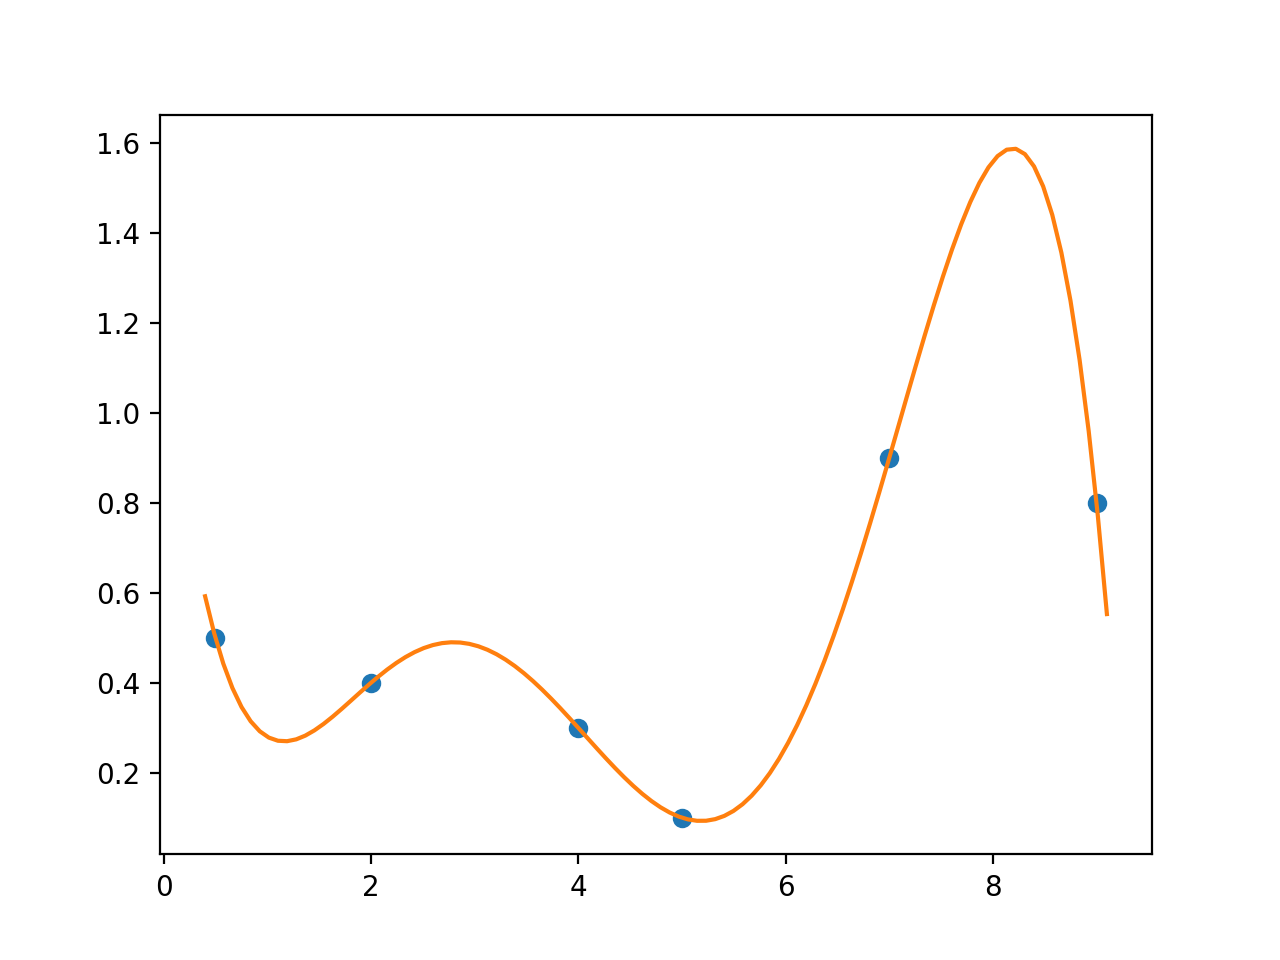

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Invent some raw data 
x=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

lp=sitp.lagrange(x, y)

xx= np.linspace(0.4, 9.1, 100)
fig = plt.figure()
plt.plot(x,y, "o", xx, lp(xx))
plt.show()

Fit a polynomial of arbitrary degree to a data set. Notice that the object returned is not a function this time and needs to be transformed into a function.

<IPython.core.display.Javascript object>


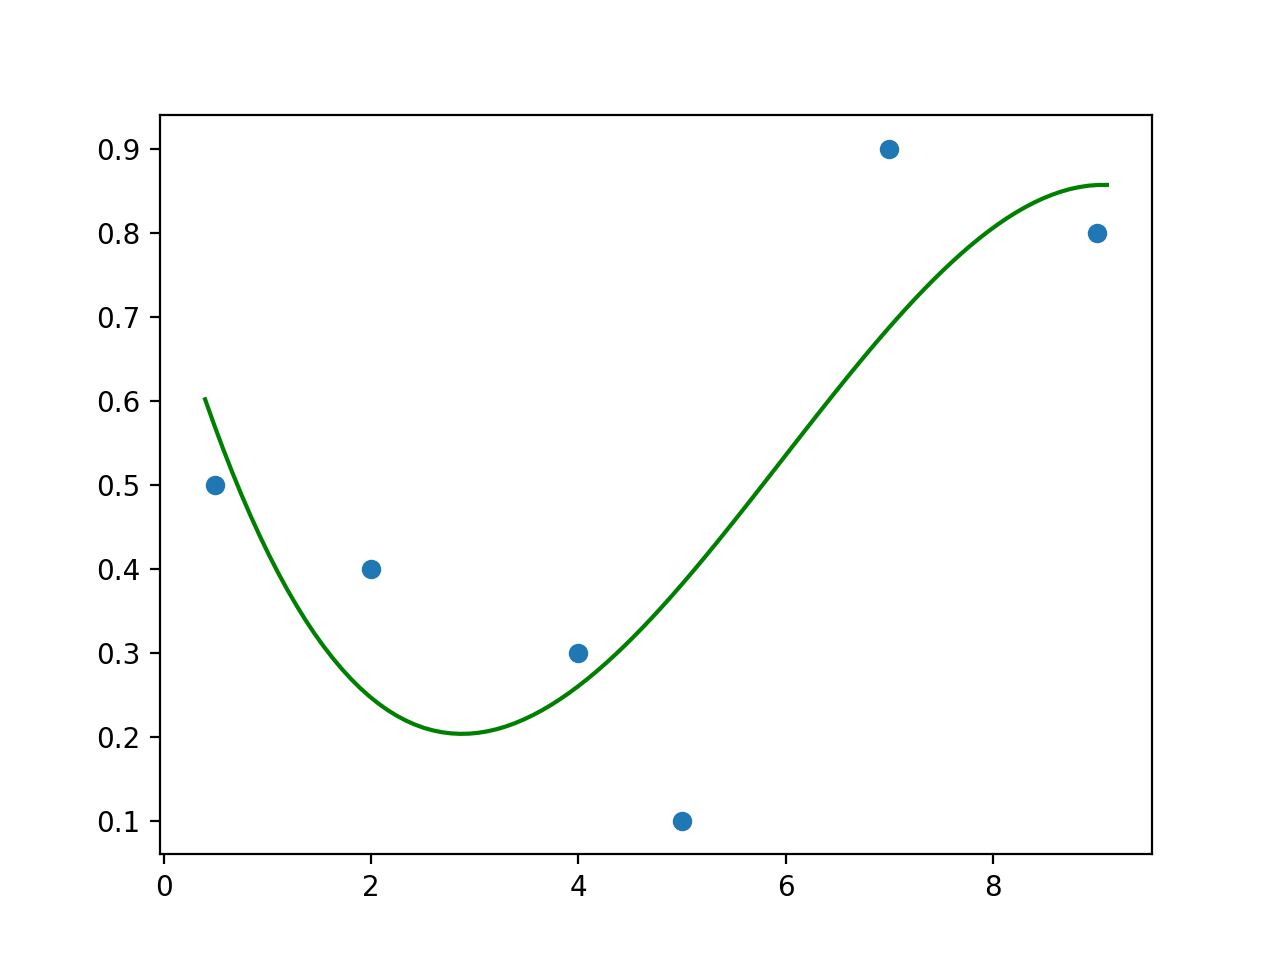

In [24]:
poly_coeffs=np.polyfit(x, y, 3)
p3 = np.poly1d(poly_coeffs)
fig = plt.figure()
plt.plot(x, y, "o", xx, p3(xx), 'g', label='Cubic')
plt.show()

### Optimisation

`scipy.optimise` provides a very wide range of optimisation methods: Newton-like minimization algorithms, least square methods, root finding... 

NB. Examples below are inspired from the official documentation. Interesting examples require setting up complex problems ands exceed the scope of this presentation.

In [25]:
import scipy.optimize as sopt

From a simple 1D problem:

In [26]:
def f(x):
    return -np.exp(-(x - 0.2)**4)
 
result = sopt.minimize_scalar(f)

x_min = result.x
print(x_min)

0.1999935940127326


To a more complex one:

In [27]:
def f(x):   # rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sopt.minimize(f, [2,-1], method="Newton-CG", jac=jacobian) 

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 52
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

### Special functions

`scipy.specials` provides a certain number of useful mathematical functions: Airy functions, Bessel functions, elliptic integrals, gamma function, erf, binomial law, etc. 

## Plotting with Matplotlib

From the official [documentation](https://matplotlib.org/):
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. [...]

> Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

> For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

In this notebook, we are mostly focused on the [`matplotlib.pyplot`](http://matplotlib.org/api/pyplot_summary.html) submodule 

### Importing Matplotlib

The most standard:
```
import matplotlib.pyplot as plt
```
Be careful to anonymous imports (`from matplotlib.pyplot import *` that will pollute your namespace.

iPython magic can be used to display plots in the browser:
```
%matplotlib inline
```
or for fancier dynamic plots
```
%matplotlib notebook
```
You can see what magic commands do by typing `?%matplotlib inline`. Note that, in that case, you need to import `pyplot` after the magic command.

### Basic plots (re: lecture 3)

Let's prepare some data:

In [28]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
z = np.sin(x+np.pi/2)

Plotting this data is as simple as:

<IPython.core.display.Javascript object>


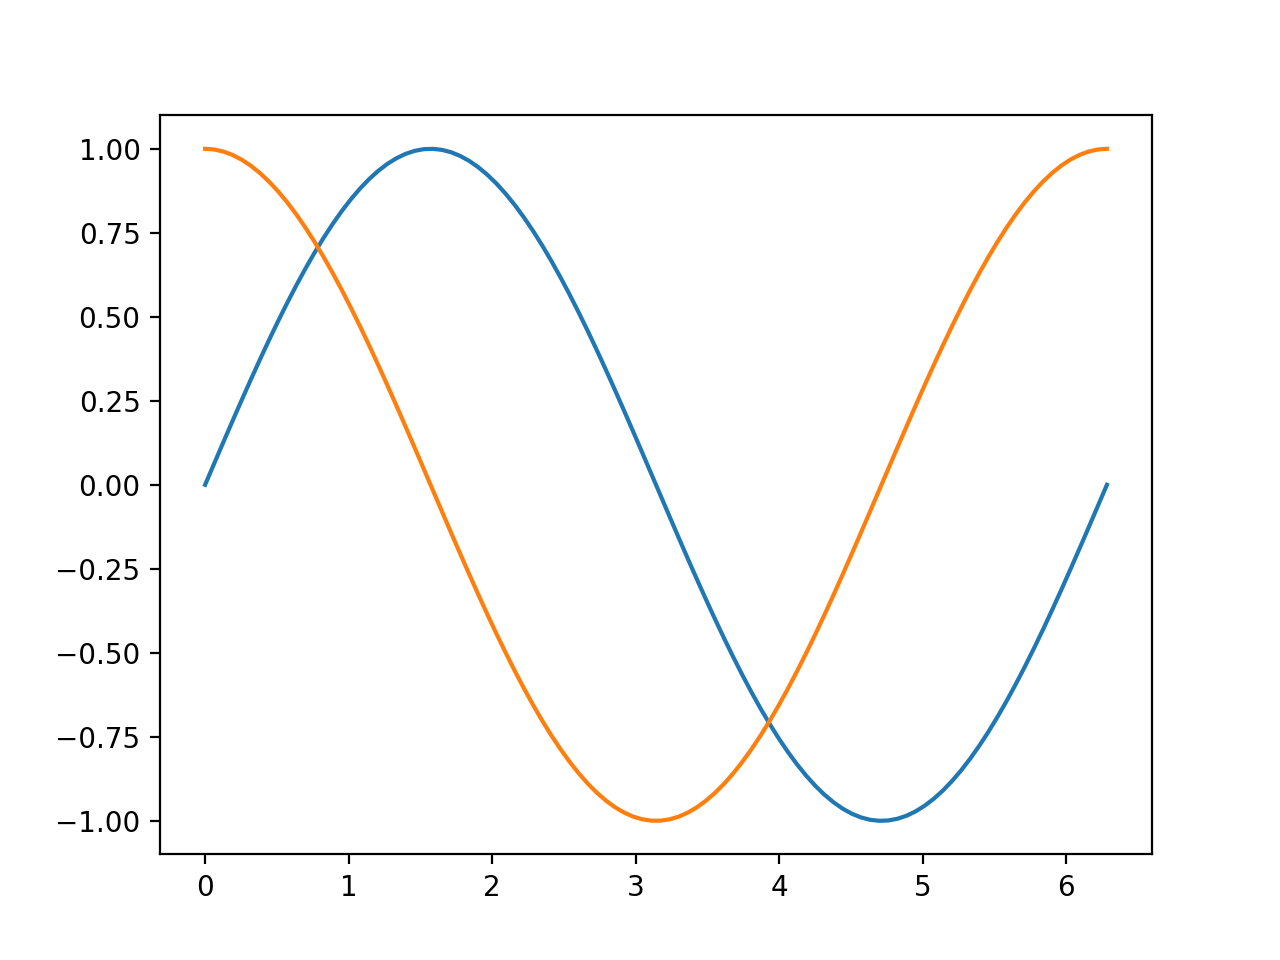

In [29]:
fig = plt.figure()

plt.plot(x, y)
plt.plot(x, z)
plt.show()

or

<IPython.core.display.Javascript object>


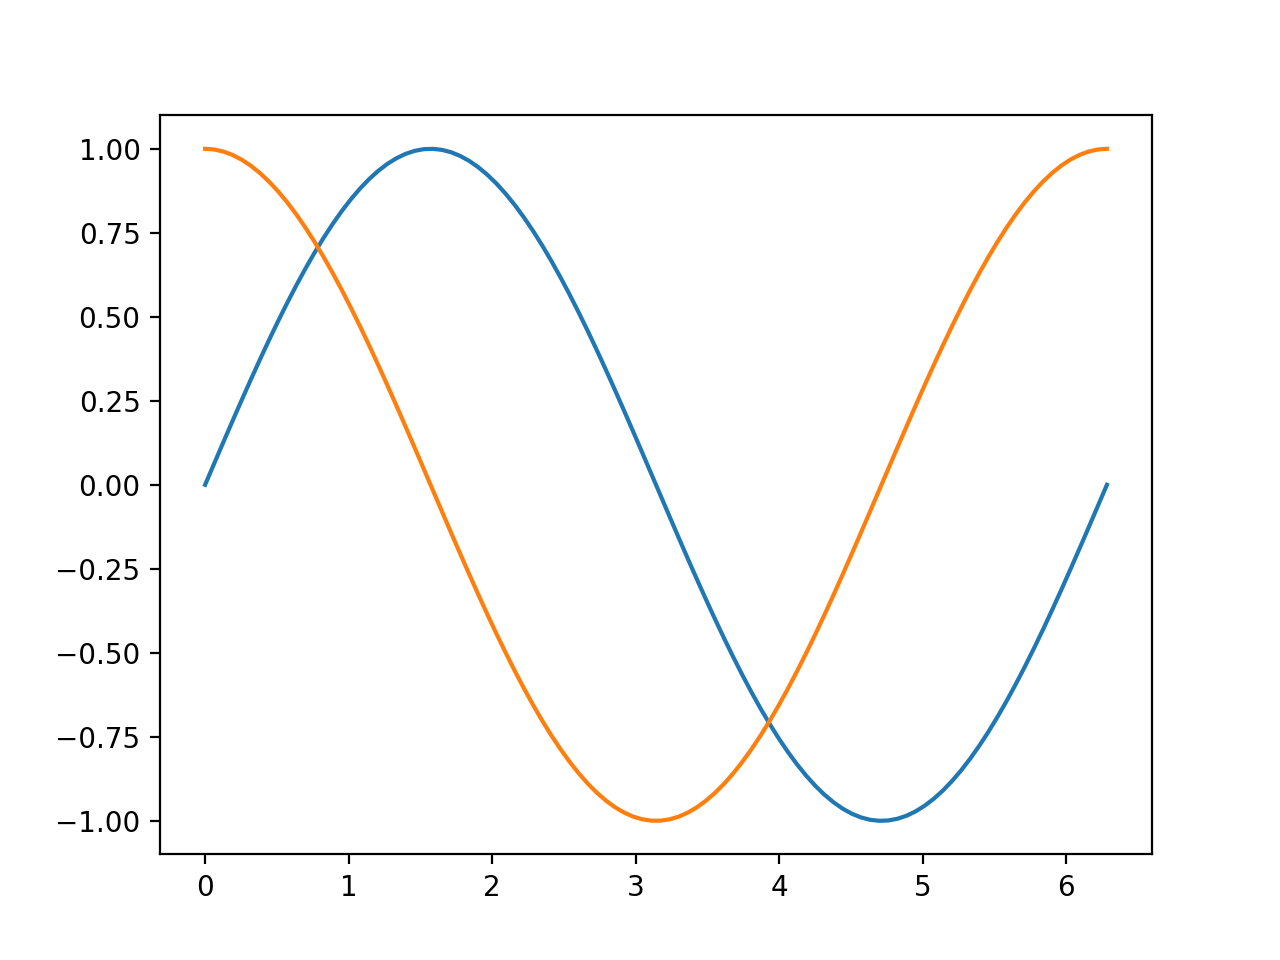

In [30]:
fig = plt.figure()

plt.plot(x,y, x, z)
plt.show()

We can specify axes limits and titles, and a global plot title:

<IPython.core.display.Javascript object>


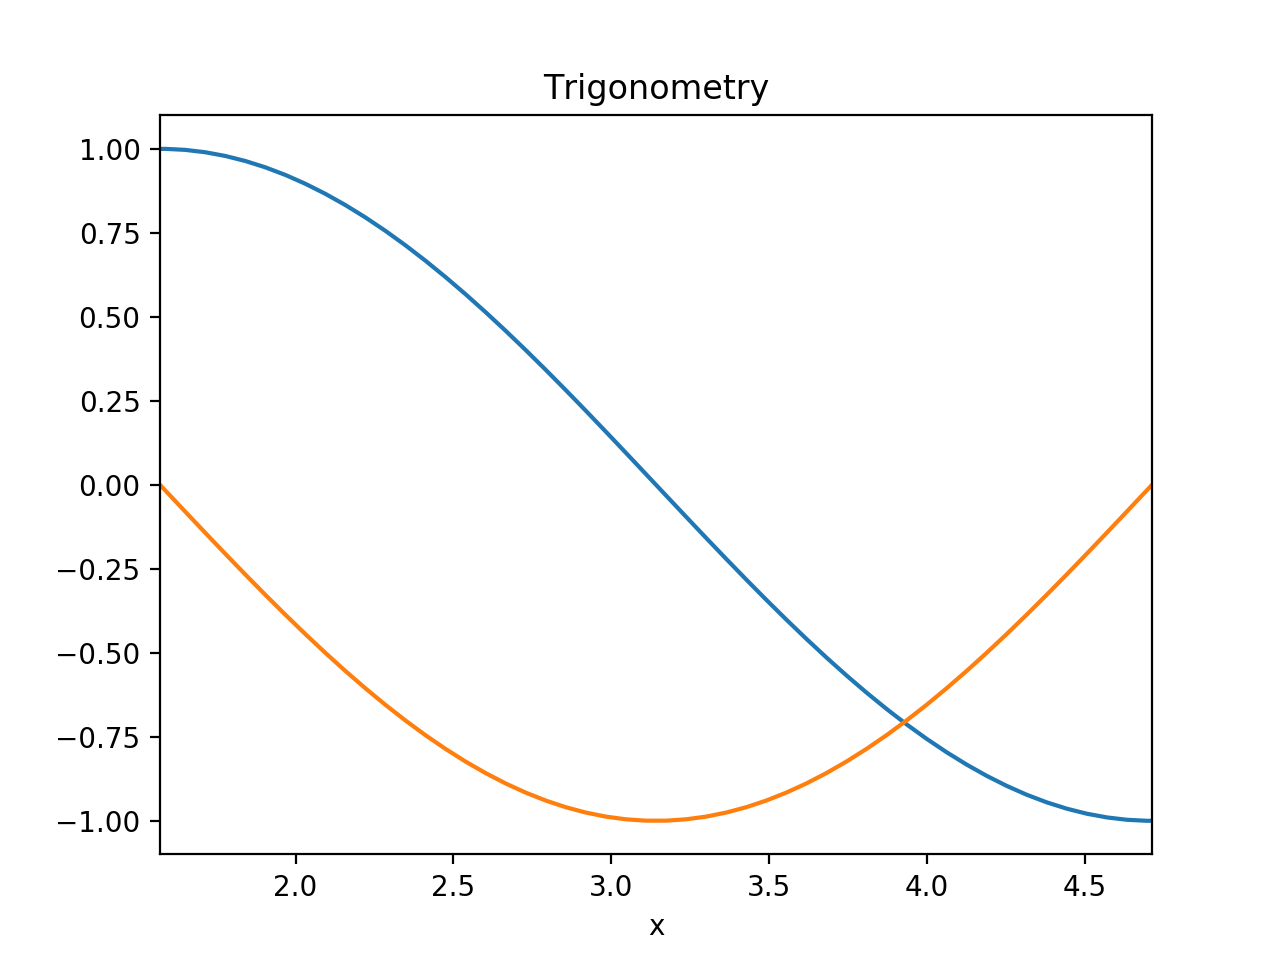

In [31]:
fig = plt.figure()

plt.xlim((x.max()*0.25, x.max()*0.75))
plt.xlabel("x")
plt.title("Trigonometry")
plt.plot(x,y, x, z)
plt.show()

as well as legends:

<IPython.core.display.Javascript object>


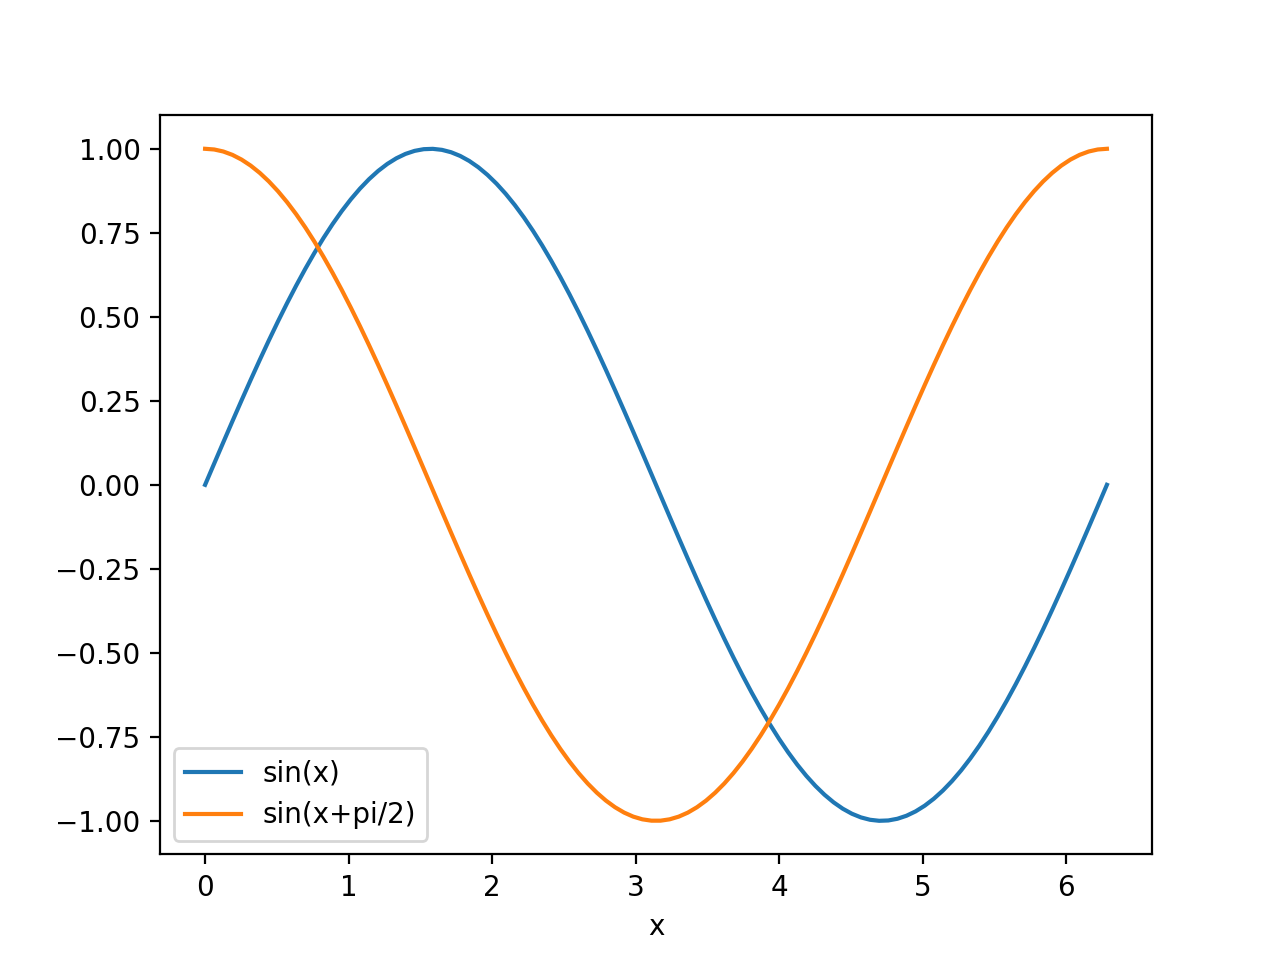

In [32]:
fig = plt.figure()

plt.xlabel("x")
plt.plot(x,y, x, z)
plt.legend(("sin(x)", "sin(x+pi/2)"))
plt.show()

### Line style

Each curve of the plot can be decorated individually:

<IPython.core.display.Javascript object>


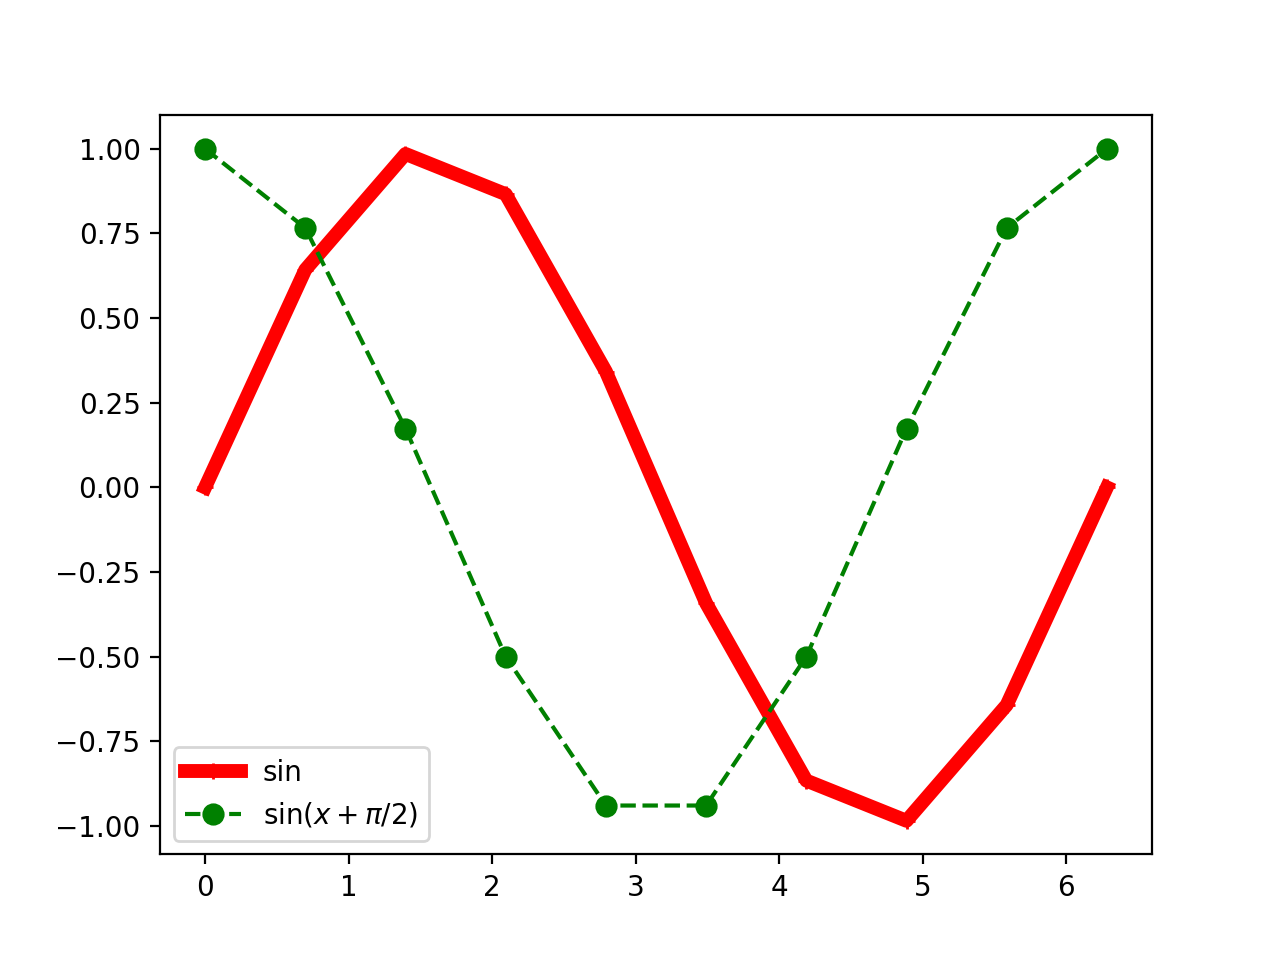

In [33]:
x1 = np.linspace(0, 2*np.pi, 10)
y1 = np.sin(x1)
z1 = np.sin(x1+np.pi/2)

fig = plt.figure()

plt.plot(x1, y1, '+-r', label="sin", linewidth=5.0)
plt.plot(x1, z1, 'o--g', label="$\sin(x+\pi/2)$", markersize=7.0)
plt.legend()
plt.show()

Plots can even be annotated !

<IPython.core.display.Javascript object>


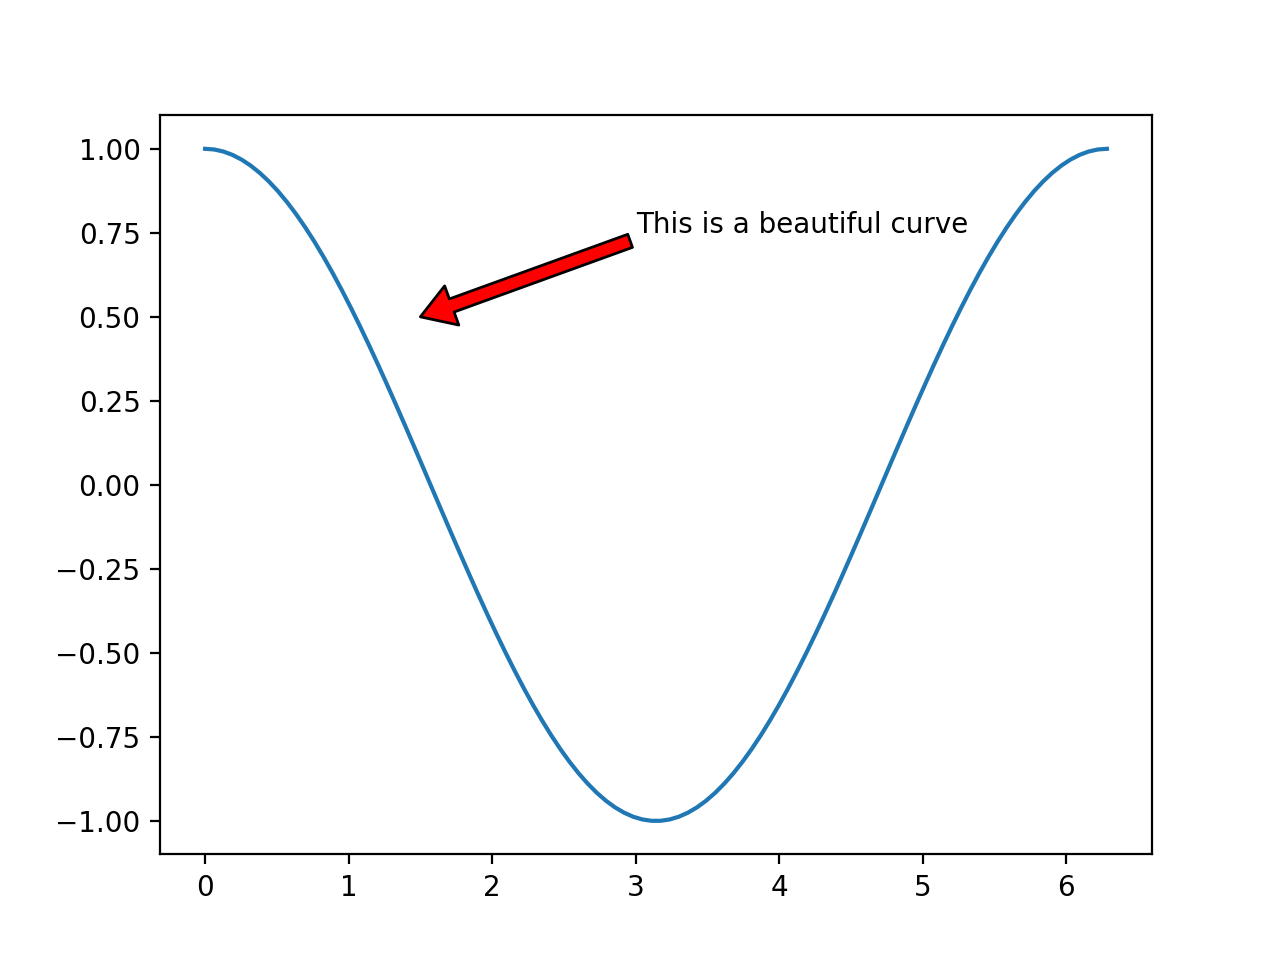

In [34]:
fig = plt.figure()

plt.plot(x, z)
atext = 'This is a beautiful curve'
arrowtiploc = (1.5, 0.5)
textloc=(3, 0.75)
plt.annotate(atext, xy=arrowtiploc, xytext=textloc,
            arrowprops=dict(width=5,headwidth=15,
            facecolor='red'))
plt.show()

### Histograms

Other kinds of plots can be made, like histograms. A more complete list of plots can be found [here](https://matplotlib.org/gallery.html)

<IPython.core.display.Javascript object>


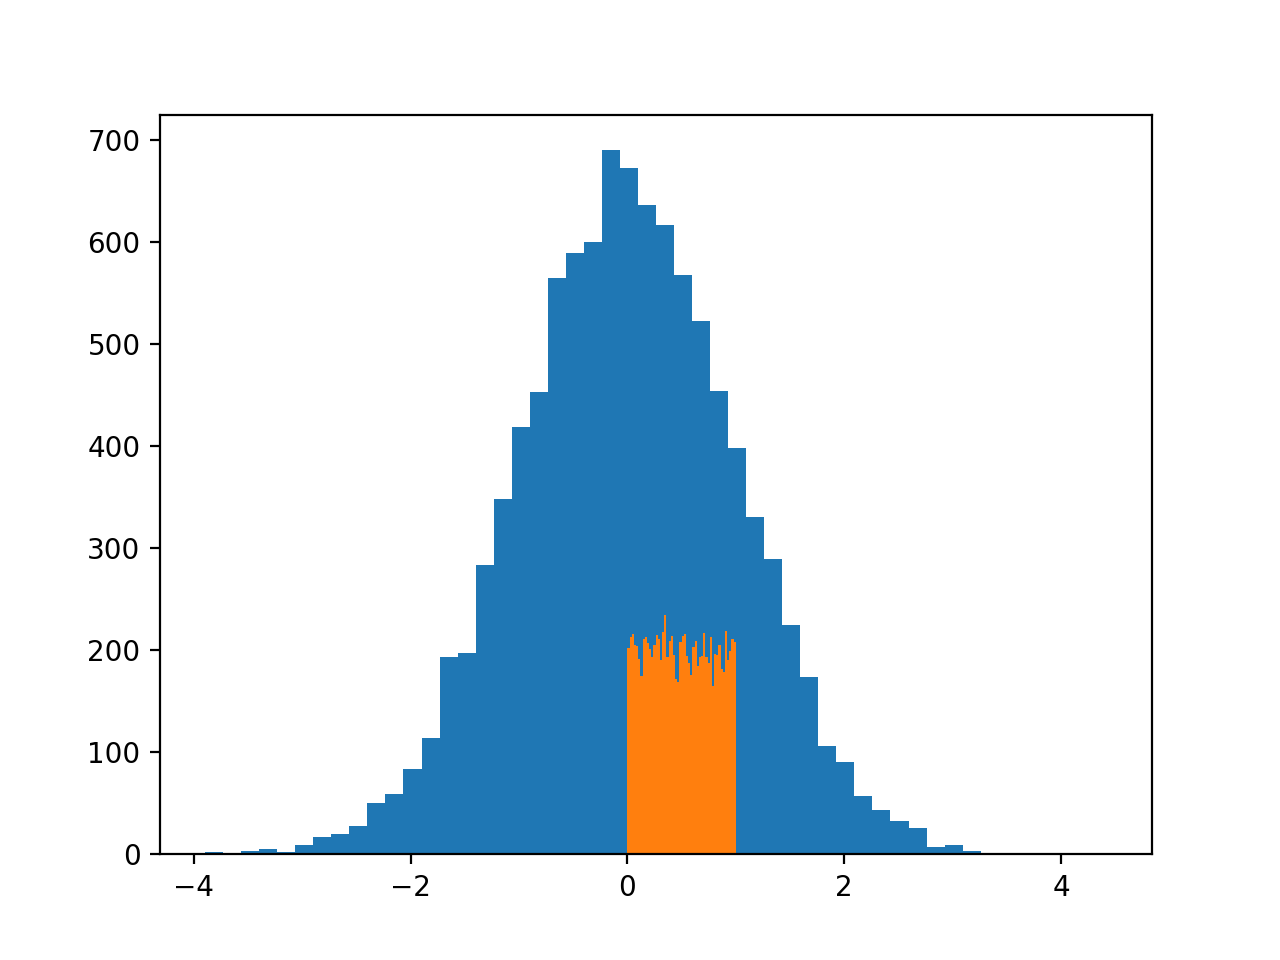

In [35]:
fig = plt.figure()

#10,000 Uniform random numbers
x2 = np.random.random(10000)
#10,000 Normally distributed random numbers
y2 = np.random.randn(10000)
#Plot both on a histogram with 50 bins
plt.hist(y2, 50)
plt.hist(x2, 50)
plt.show() #Or plt.save g("out.png")

### Saving images

Sometimes, you might want to save images for a report or a presentation. Instead of taking a screenshot of the plot, you can save it to a file. The file format is determined by the filename extension you supply. The following common  formats are supported: `.png`, `.jpg`, `.pdf` and `.ps`. There are other options to control the size and resolution of the output.

<IPython.core.display.Javascript object>


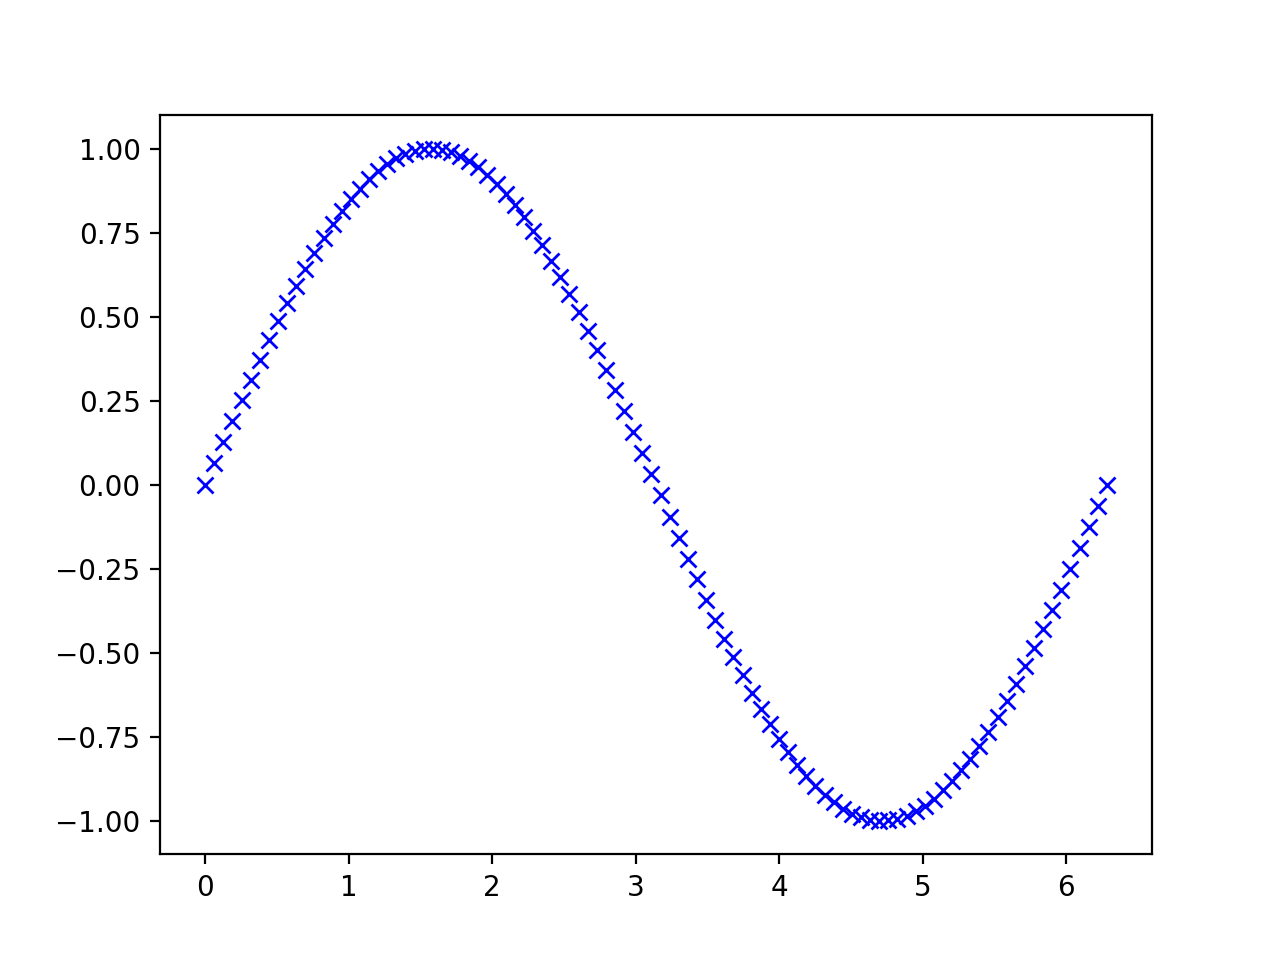

In [36]:
fig = plt.figure()

plt.plot(x, y, 'bx')
plt.savefig("sin.png", dpi=200)
plt.show()

### Subplots

Sometimes, you will want to group several plots in one figure. Matplotlib provides an flexible way of managing subplots.
```
    (fig, axes) = plt.subplots(nrows, ncols)
```
`subplots()` returns a tuple with a reference to the figure (`fig`) and an array of references to each subplot axes (`axes`)
    



<IPython.core.display.Javascript object>


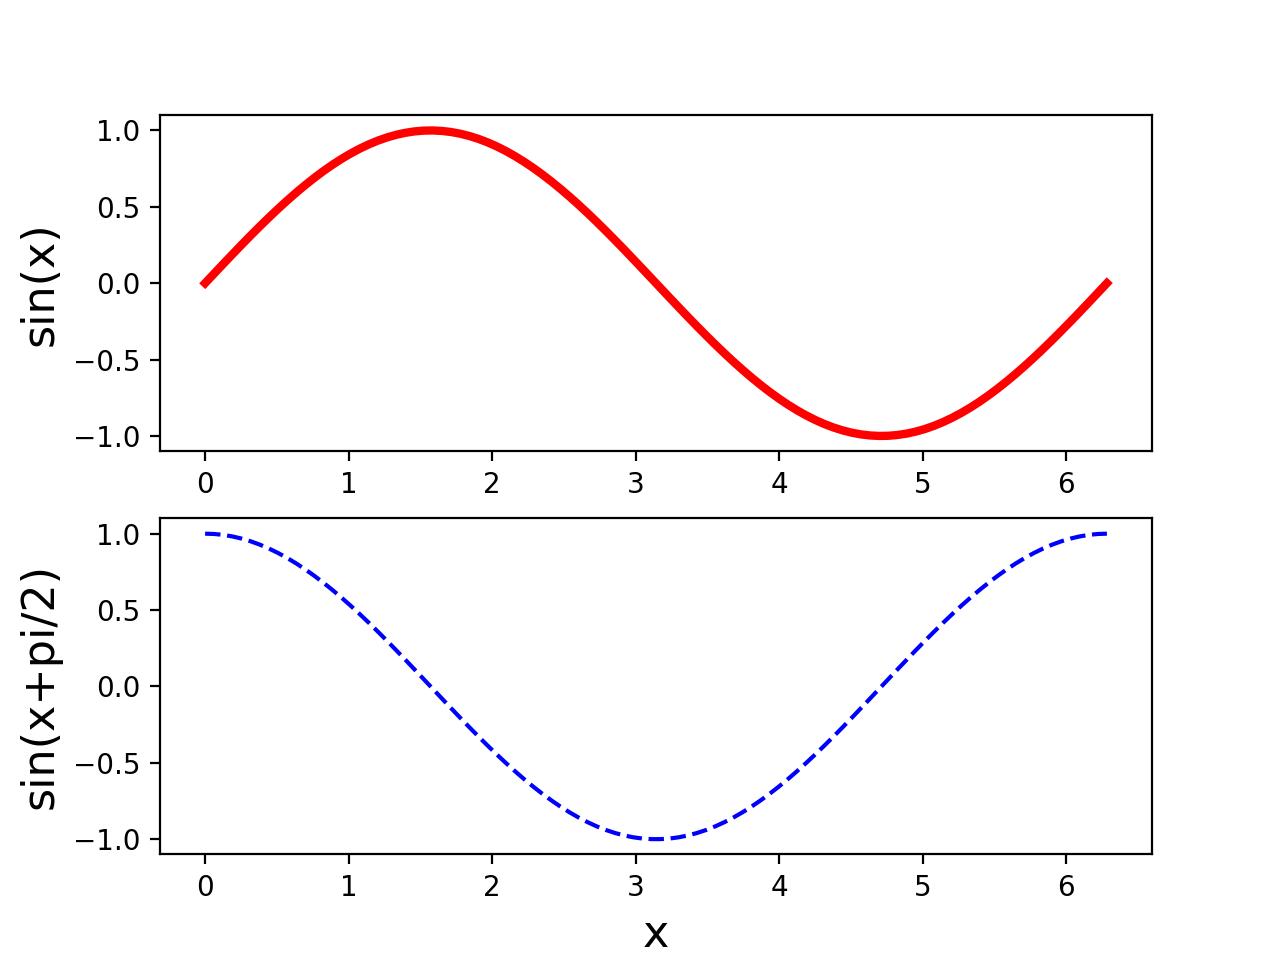

In [37]:
fig, axes = plt.subplots(2,1)
axes[0].plot(x, y, lw=3., c='r')
axes[1].plot(x, z, '--b')
axes[1].set_xlabel("x", fontsize=16)
axes[0].set_ylabel("sin(x)", fontsize=16)
axes[1].set_ylabel("sin(x+pi/2)", fontsize=16)
plt.show()

In [ ]:
(fig, axes) = plt.subplots(2, 2, figsize=(10,7))
axes[0,0].plot(x, y, 'r')
axes[0,1].plot(x, y, 'b')
axes[1,0].plot(x, y, 'g')
axes[1,1].plot(x, y, 'k')
plt.show()


Alternatively, you can select a subplot and make it the "current subplot"

<IPython.core.display.Javascript object>


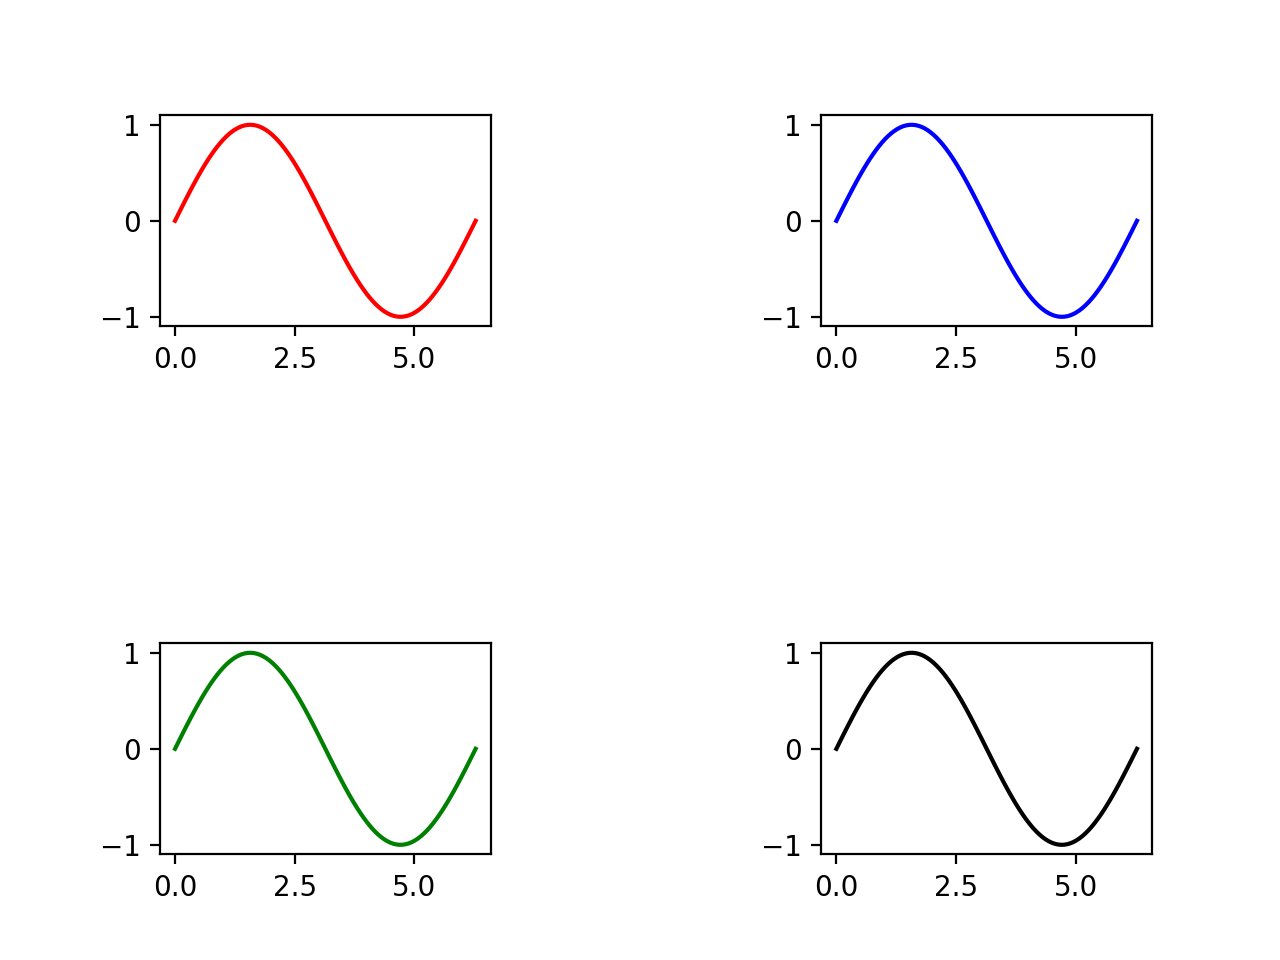

In [38]:
(fig, axes) = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 1., hspace=1.5)

plt.sca(axes[0,0])
plt.plot(x, y, 'r')
plt.sca(axes[0,1])
plt.plot(x, y, 'b')
plt.sca(axes[1,0])
plt.plot(x, y, 'g')
plt.sca(axes[1,1])
plt.plot(x, y, 'k')
plt.show()

For more complex subplot layouts `plt.subplot2grid` can be used. It maps the figure to a grid, and you can define subplots spanning across several cells of the grid. It takes 4 arguments:
```
subplot2grid(shape,
             location,
             rowspan = 1,
             colspan = 1)
```
`shape` is the shape of the grid (number of cells), it needs to be the same for each call of the function within one figure. `location` is the location of the top-left corner of the subplot. `rowspan` and `colspan` define respectively the length and heigth of the plot.

<IPython.core.display.Javascript object>


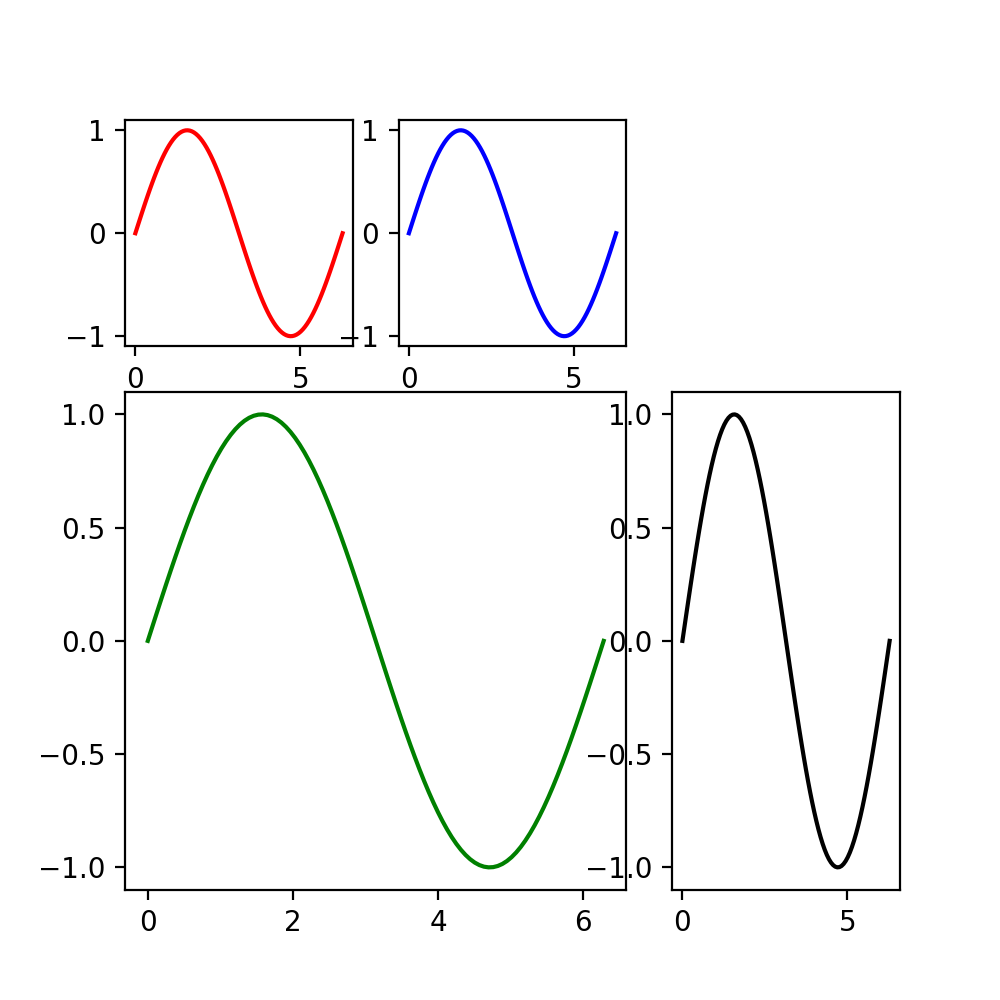

In [39]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
# what happens if you uncomment the following line? 
#ax5 = plt.subplot2grid((3, 3), (1, 1), colspan=1, rowspan=1)
ax1.plot(x, y, 'r')
ax2.plot(x, y, 'b')
ax3.plot(x, y, 'g') 
ax4.plot(x, y, 'k')
plt.show()

### 2D

There are several ways to represent multidimensional data. One can choose to represent the data contained in a 2D domain (a matrix) with colors (in a 2D plot), or with surfaces (in a 3D plot).

<IPython.core.display.Javascript object>


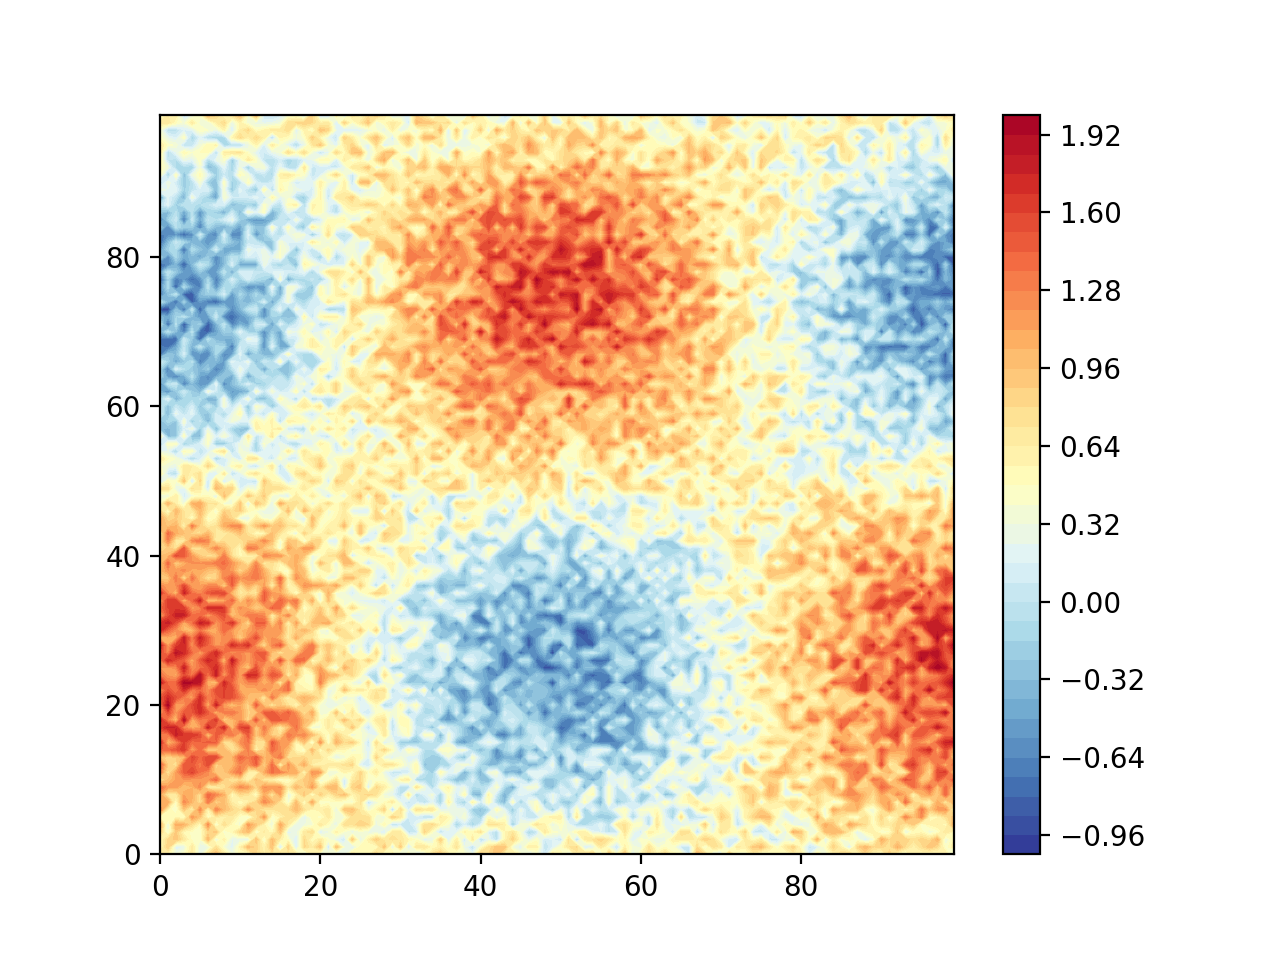

In [40]:
fig = plt.figure()

N = 100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x); z = np.cos(x)
#Create 2D field from outer product of previous 1D functions
noise = np.random.random(N**2)
u = np.outer(y,z) + noise.reshape(N,N)
plt.contourf(u, 40, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

### <span style="color:blue">Exercise </span>

Let's consider the following functions defined on a 2D domain $\Omega = [0,1]x[0,1]$:
$$ a(x) = \tanh(50\sin(\frac{25}{2}\pi x))$$
for any $x\in [0,1]$, and
$$ f(x) = a(a(|x-x0|)) + a(a(|x-x1|)) $$
for any $x \in \Omega$, with $x0=(0,0)$ and $x0=(1,1)$

Plot $f$ on $\Omega$. You may want to use `numpy.meshgrid`.

In [41]:
fig = plt.figure()

N = 100
x = np.linspace(0,1.pi,N)
a = np.tanh(50*np.sin(25/2*np.pi*x))
y = a * (a * (abs.(x-x0))) + a * (a * (abs(x - x1)))
#Create 2D field from outer product of previous 1D functions
noise = np.random.random(N**2)
u = np.outer(y,z) + noise.reshape(N,N)
plt.contourf(u, 40, cmap=plt.cm.RdYlBu_r)
plt.colorbar()
plt.show()

SyntaxError: invalid syntax (<ipython-input-41-c2c39ce180b5>, line 4)

### 3D

A wide variety of options are available for 3D plots, that are usually contained in specific submodules.

<IPython.core.display.Javascript object>


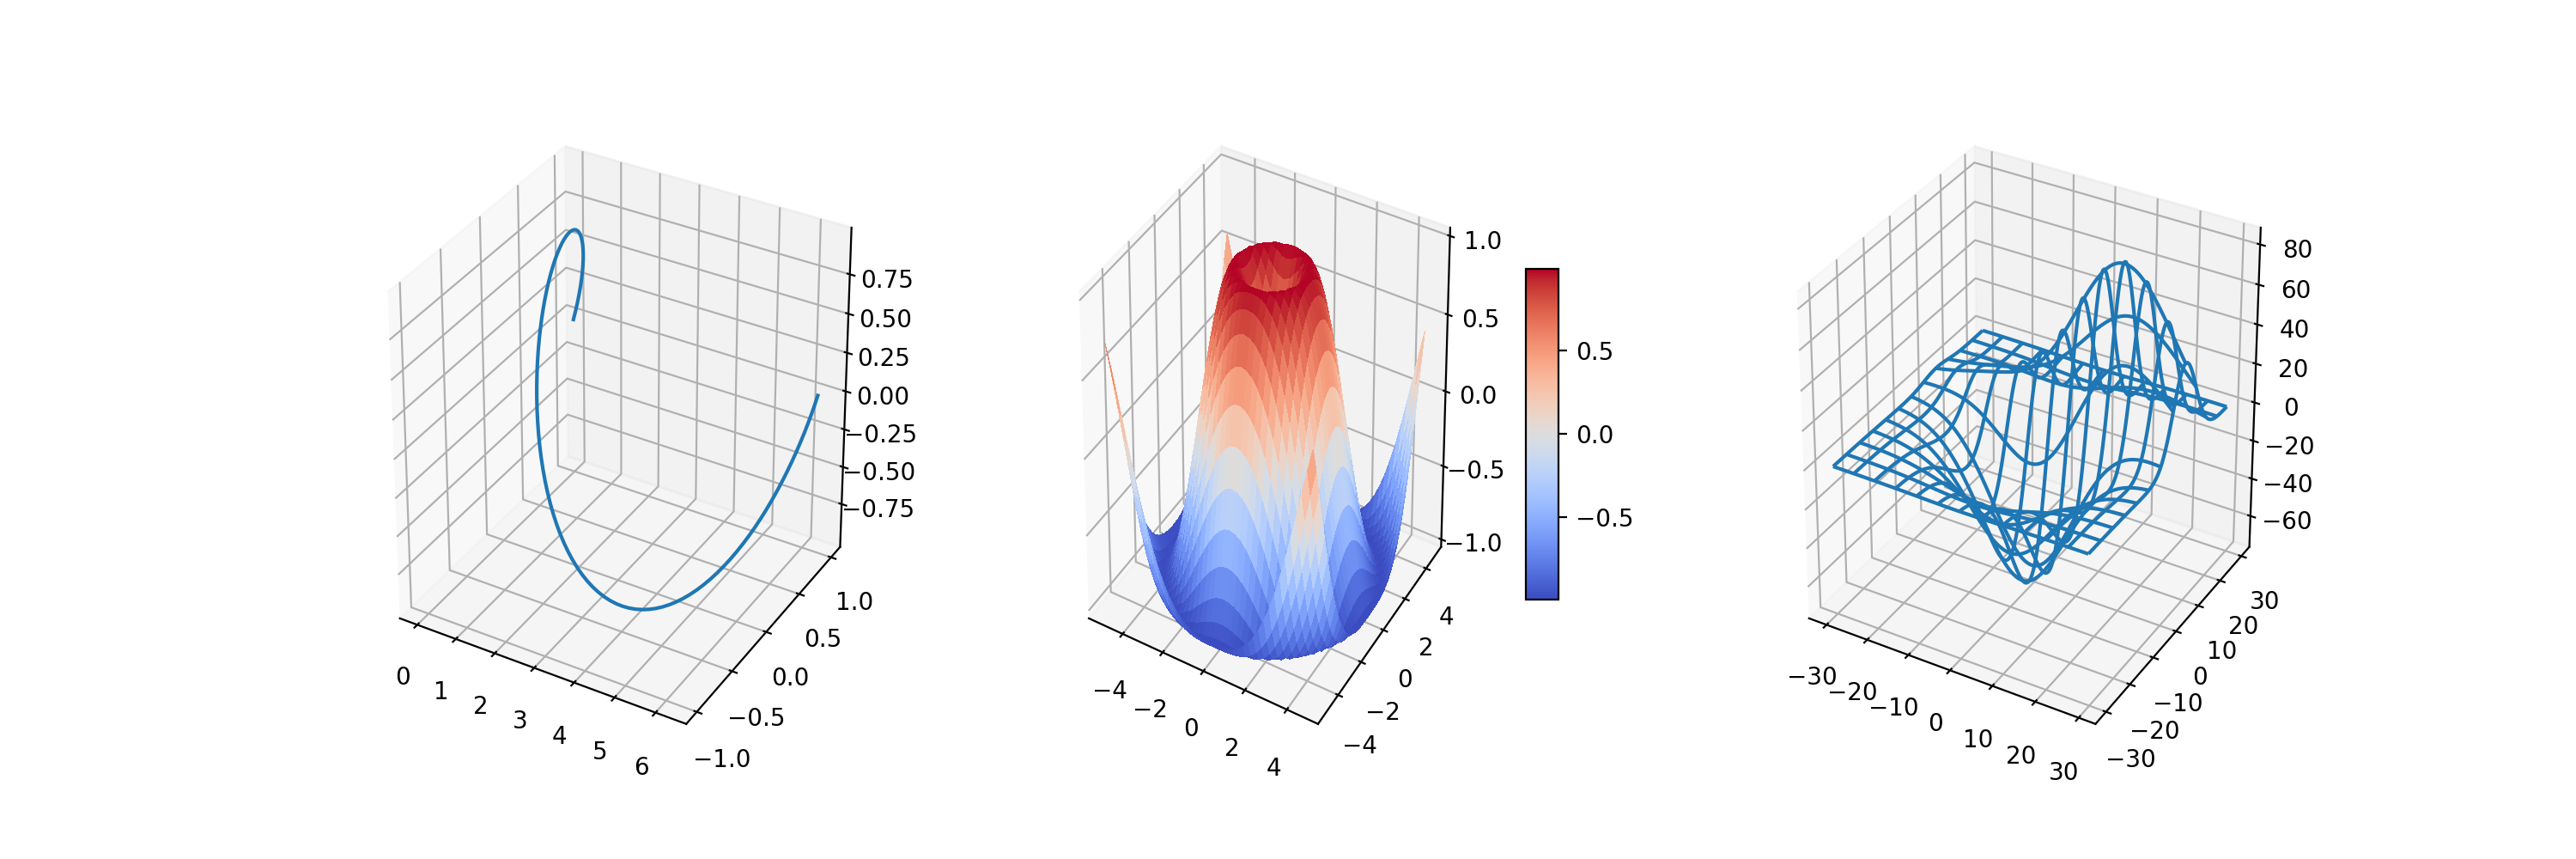

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data


fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

ax = fig.add_subplot(1,3,1, projection='3d')

# plot a curve
x = np.linspace(0.,2*np.pi,100)
ax.plot(x, np.cos(x), np.sin(x))

ax = fig.add_subplot(1, 3, 2, projection='3d')

# plot a 3D surface
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 3, 3, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

### Animations

Animations (*i.e.* series of images) can be created with matplotlib. However, they tend to be very resource consuming, and should only be use with great measure.

<IPython.core.display.Javascript object>


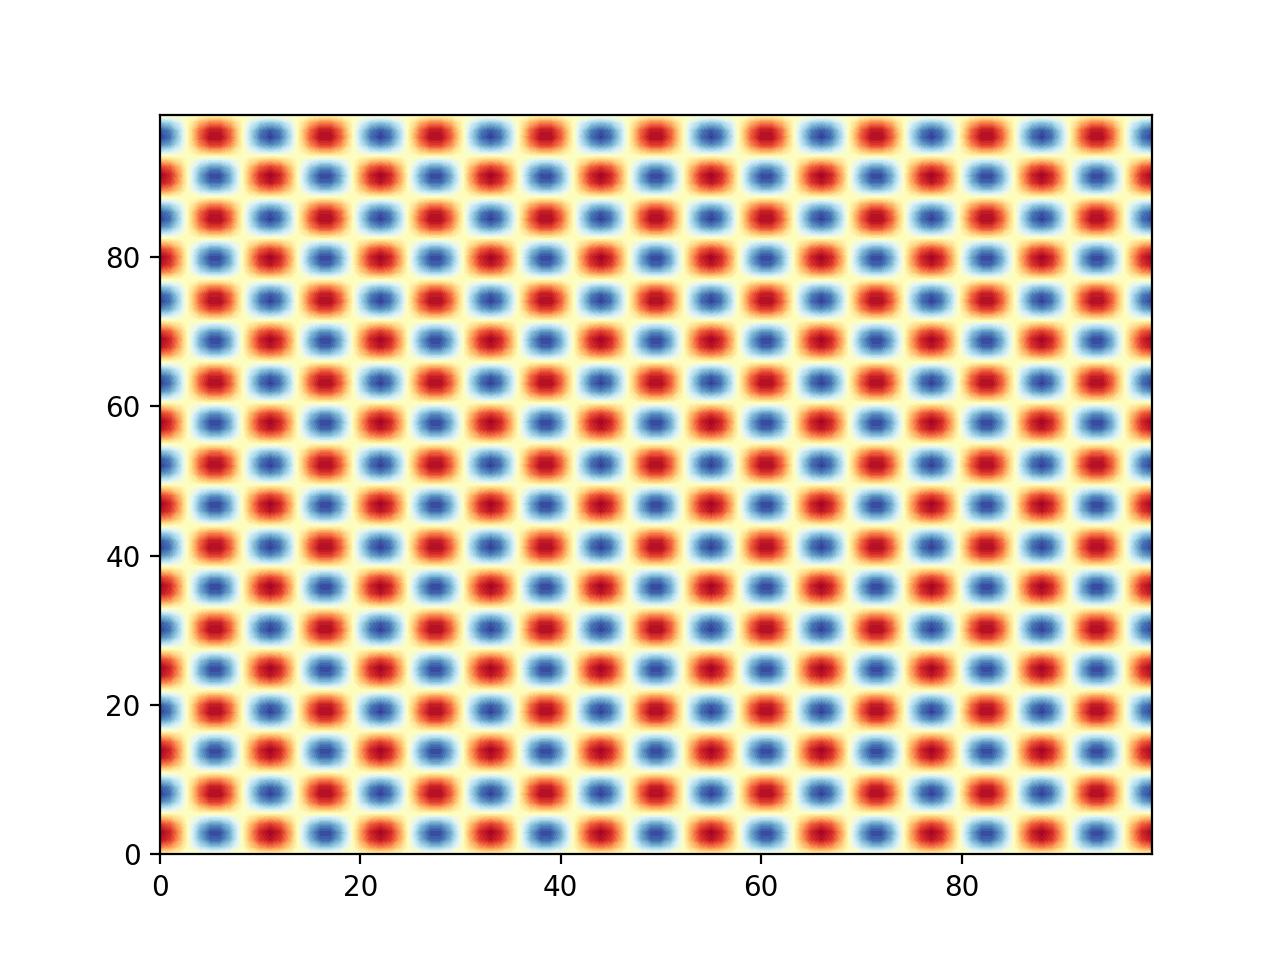

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

fig = plt.figure()

def get_field(a, N = 100):
    x = a*np.linspace(0,2*np.pi,N)
    y = np.sin(x); z = np.cos(x)
    out =  np.outer(y,z)
    plt.contourf(out, 40, cmap=plt.cm.RdYlBu_r)

        
ani= matplotlib.animation.FuncAnimation(plt.gcf(), get_field, frames=range(0,10),
                                       interval=500, repeat=False)
plt.show()

In [ ]:
import random

ysample = random.sample(range(-50, 50), 100)

xdata = []
ydata = []

fig = plt.figure()

axes = plt.gca()
axes.set_xlim(0, 100)
axes.set_ylim(-50, +50)
line, = axes.plot(xdata, ydata, 'r-')

def update(i):
    xdata.append(i)
    ydata.append(ysample[i])
    line.set_xdata(xdata)
    line.set_ydata(ydata)

ani= matplotlib.animation.FuncAnimation(plt.gcf(), update, frames=100,
                                       interval=100, repeat=False)

plt.show()

Movies can be generated by saving images then calling an external program like `ffmpeg`, or using the `writers` function from the `animation` submodule, which also uses `ffmpef` under the hood.

### Widgets

Matplotlib provides widgets, that allow you to create dynamic plots with sliders and things like that.

<IPython.core.display.Javascript object>


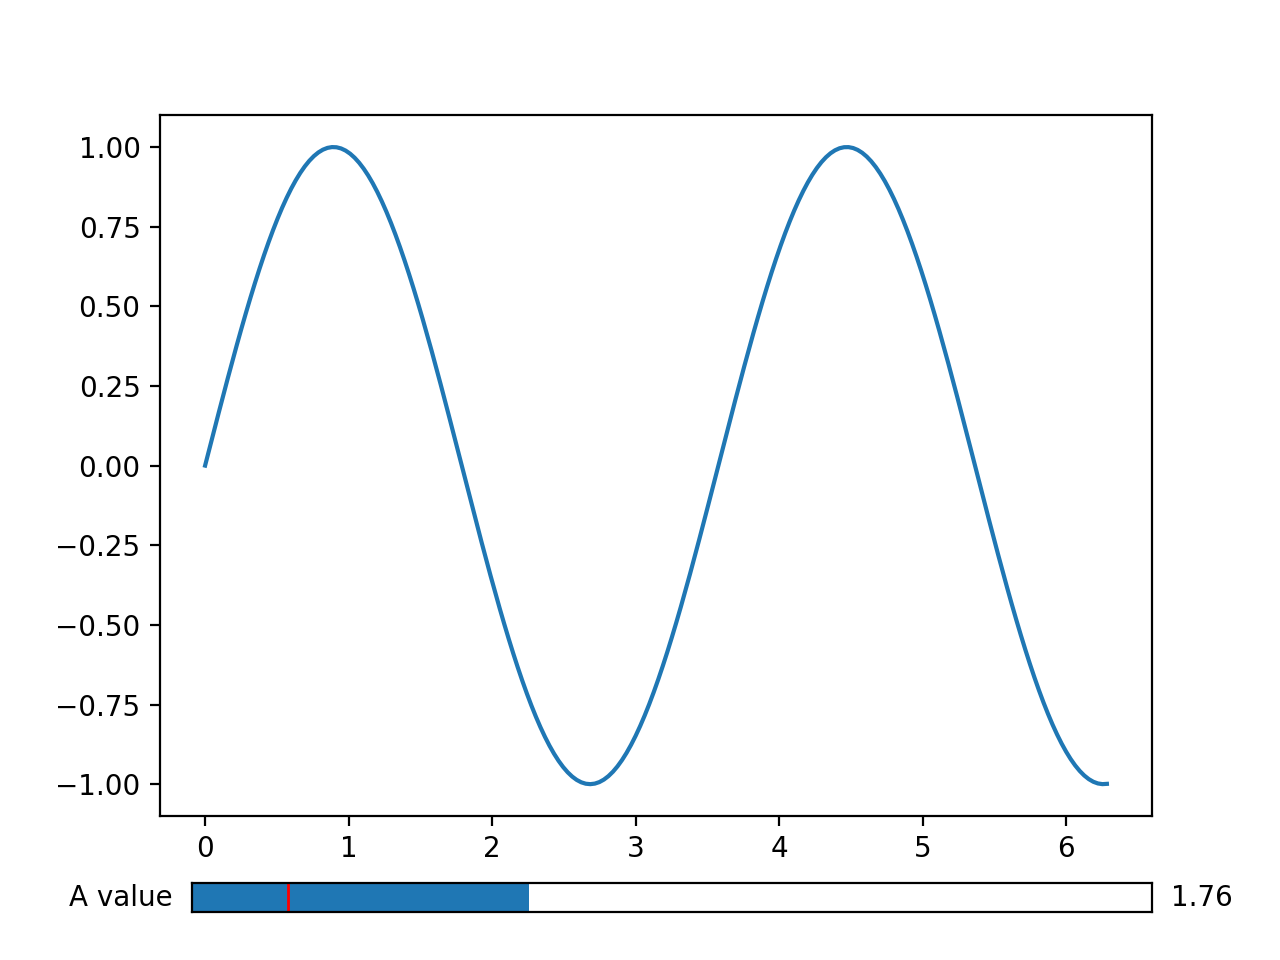

In [44]:
import matplotlib.widgets as mw

fig = plt.figure()

#Setup initial plot of sine function
x = np.linspace(0, 2*np.pi, 200)
l, = plt.plot(x, np.sin(x))
#Adjust figure to make room for slider
plt.subplots_adjust(bottom=0.15)
axslide = plt.axes([0.15, 0.05, 0.75, 0.03]) 
s = mw.Slider(axslide, 'A value', 0., 5.)
#s = widgets.FloatSlider(axslide, 'A value', 0., 5.)

#Define function
def update(A):
    l.set_ydata(np.sin(A*x))
    plt.draw()
#Bind update function to change in slider
s.on_changed(update)
plt.show()

## Summary

  * `NumPy`: defines `nd.array` which is an efficient structure for large arrays, matrices and tensors, and functions to manipulate them
  * `SciPy`: defines a lot of user-friendly routines useful for scientific codes
  * Both rely on efficient low level code, and will generally be much faster than if you try to re-implement them yourself
  * Vectorization !
  * `Matplotlib`: allows you to draw and save plots, from the simplest 2D line plot to complicated 3D plots.
  * Refer to online documentation for a complete list of features: https://docs.scipy.org/doc/